In [20]:
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.recurrent import LSTM
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding

In [21]:
top_words = 5000
input_length = 500

In [22]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [23]:
X_train = sequence.pad_sequences(X_train, maxlen=input_length)
X_test = sequence.pad_sequences(X_test, maxlen=input_length)

In [24]:
visible = Input(shape=(input_length ,))
embedding = Embedding(top_words, 32, input_length=input_length)(visible)
hidden1 = LSTM(100)(embedding)
hidden2 = Dense(100, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm_3 (LSTM)               (None, 100)               53200     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 223,401
Trainable params: 223,401
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4, batch_size=128)
model.save('recurrent.h5')

Epoch 1/4
196/196 [==============================] - 648s 3s/step - loss: 0.4738 - accuracy: 0.7584 - val_loss: 0.3892 - val_accuracy: 0.8313
Epoch 2/4
196/196 [==============================] - 709s 4s/step - loss: 0.2775 - accuracy: 0.8880 - val_loss: 0.3520 - val_accuracy: 0.8526
Epoch 3/4
196/196 [==============================] - 728s 4s/step - loss: 0.2366 - accuracy: 0.9080 - val_loss: 0.3396 - val_accuracy: 0.8530
Epoch 4/4
196/196 [==============================] - 668s 3s/step - loss: 0.2167 - accuracy: 0.9160 - val_loss: 0.3151 - val_accuracy: 0.8687


In [29]:
from keras.models import load_model
model = load_model('recurrent.h5')

In [30]:
scores = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

782/782 [==============================] - 110s 139ms/step - loss: 0.3151 - accuracy: 0.8687
Accuracy: 86.87%


782/782 - 122s - loss: 0.3151 - accuracy: 0.8687 - 122s/epoch - 156ms/step


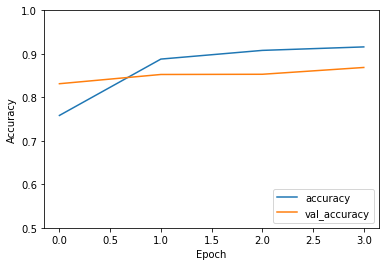

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)